<a href="https://colab.research.google.com/github/Shiva-Gangadhar/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset


In [2]:
data = pd.read_csv('Housing.csv')

Dataset Overview:

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


There are no missing values.

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [35]:
# Handle missing values
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [38]:
# Define preprocessing steps
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_imputer = SimpleImputer(strategy='median')  # Handling missing numerical values
cat_imputer = SimpleImputer(strategy='most_frequent')  # Handling missing categorical values
encoder = OneHotEncoder(handle_unknown='ignore')  # Encoding categorical features
scaler = StandardScaler()  # Scaling numerical features

In [39]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', scaler)]), numerical_features),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', encoder)]), categorical_features)
])


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x = data.drop('price', axis=1)
y = data['price']

In [47]:
# Splitting dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()

In [51]:
df_encoded = x_train.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes


In [52]:
x_train = df_encoded.copy()

In [54]:
model.fit(x_train,y_train)

LinearRegression()

In [59]:
df_encoded = x_test.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

x_test = df_encoded.copy()

In [67]:
results=[]
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Logistic Regression:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
results.append(["Logistic Regression", mae, rmse, r2])

Logistic Regression:
MAE: 979679.69
RMSE: 1331071.42
R² Score: 0.65


In [68]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

In [69]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"DecisionTree Regressor:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
results.append(["DecisionTree Regressor", mae, rmse, r2])

DecisionTree Regressor:
MAE: 1257110.09
RMSE: 1710758.39
R² Score: 0.42


In [72]:
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                    Model           MAE          RMSE  R² Score
0     Logistic Regression  9.796797e+05  1.331071e+06  0.649475
1  DecisionTree Regressor  1.257110e+06  1.710758e+06  0.420981


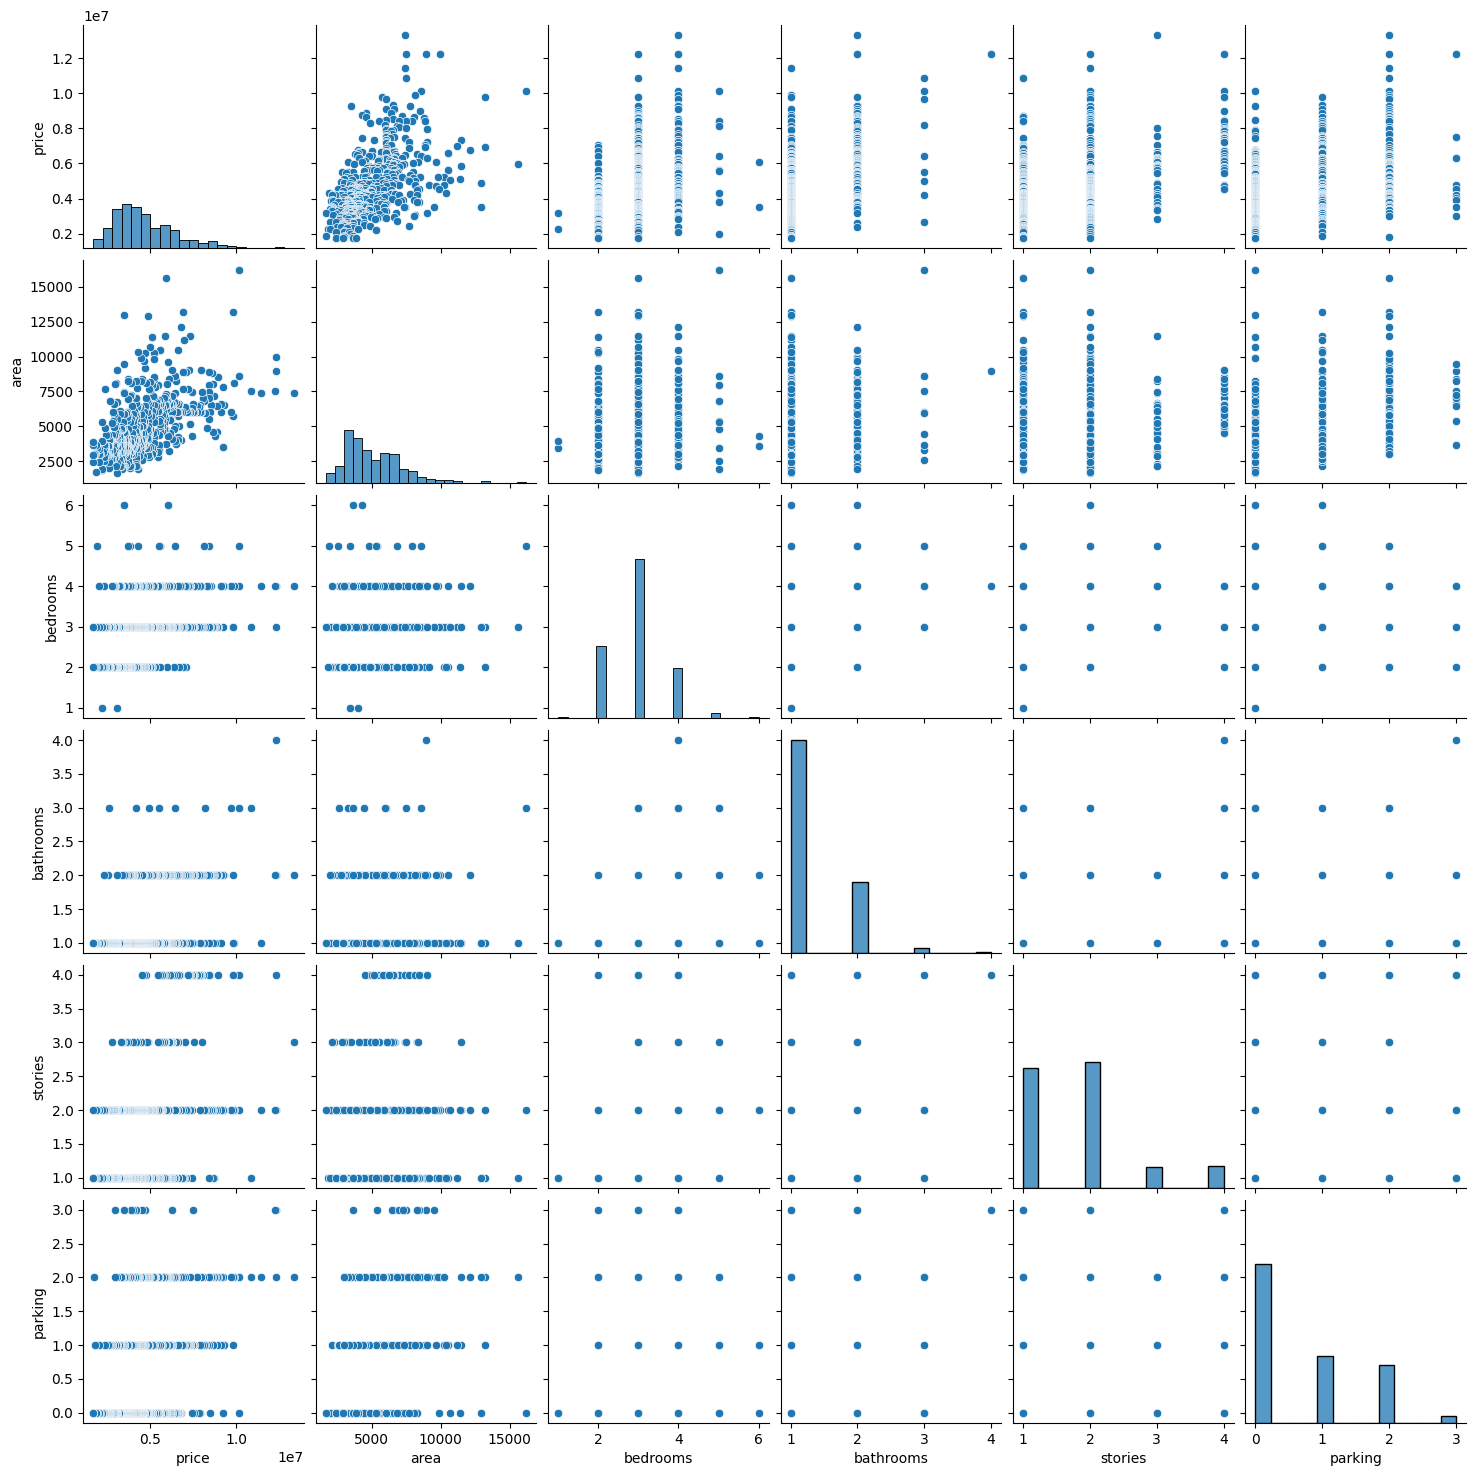

In [82]:
sns.pairplot(data)
plt.show()

In [84]:
# Save results to CSV
results_df.to_csv("model_performance.csv", index=False)
print("Model performance saved to 'model_performance.csv'")

Model performance saved to 'model_performance.csv'


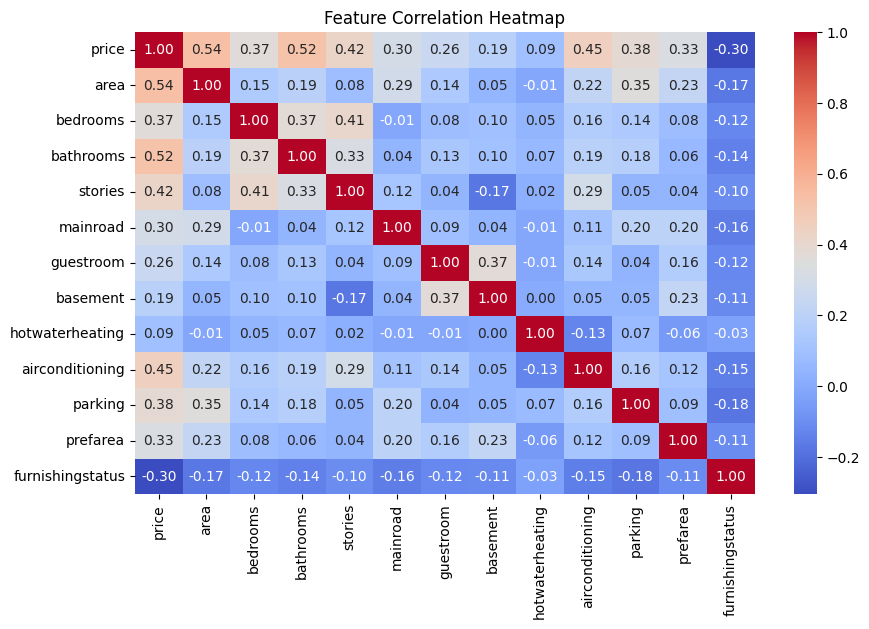

In [75]:
train_data = data.copy()
df_encoded = train_data.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
train_data = df_encoded.copy()

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [79]:
train_data['hotwaterheating_bathrooms_ratio'] = train_data['hotwaterheating'] / train_data['bathrooms']
train_data['airconditioning_bedrooms_ratio'] = train_data['airconditioning'] / train_data['bedrooms']

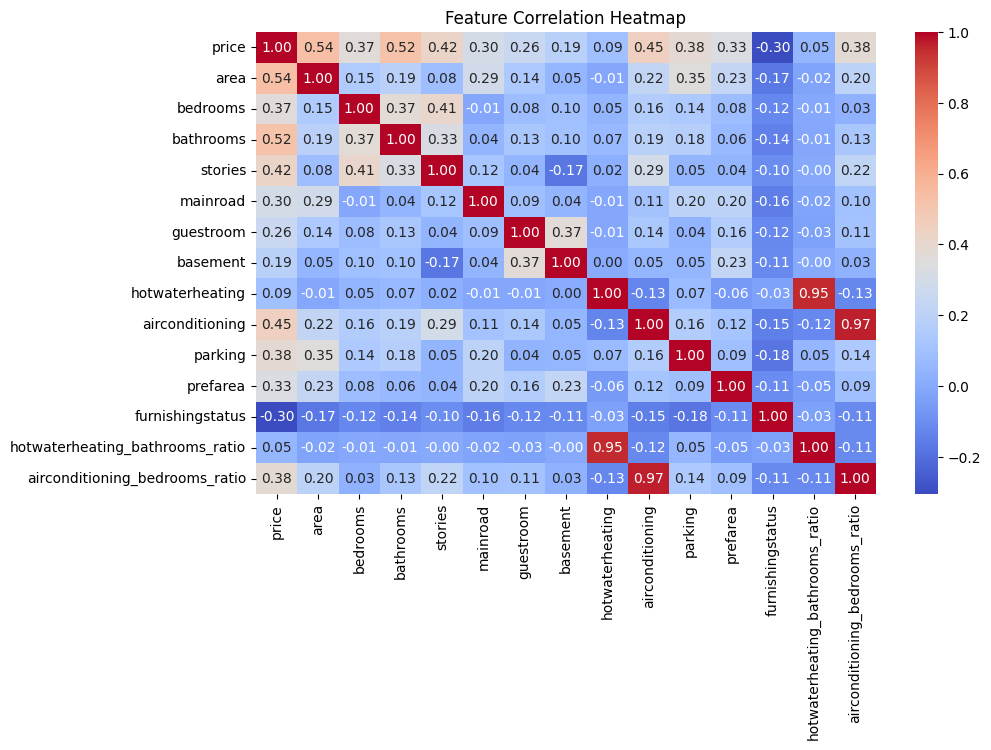

In [80]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [85]:
model = DecisionTreeRegressor()
x=train_data.drop('price', axis=1)
y=train_data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Logistic Regression:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Logistic Regression:
MAE: 1325922.02
RMSE: 1754268.23
R² Score: 0.39
